## Load dataframe

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("datasets/data-small/TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])

In [3]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


## Show some rows

In [4]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


## Show some columns

In [5]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [6]:
df["    DATE"]

0       1860-01-01
1       1860-01-02
2       1860-01-03
3       1860-01-04
4       1860-01-05
           ...    
59316   2022-05-27
59317   2022-05-28
59318   2022-05-29
59319   2022-05-30
59320   2022-05-31
Name:     DATE, Length: 59321, dtype: datetime64[ns]

In [7]:
df[['   TG', '    DATE']]

,TG,DATE
0,21,1860-01-01
1,46,1860-01-02
2,31,1860-01-03
3,37,1860-01-04
4,31,1860-01-05
...,...,...
59316,-9999,2022-05-27
59317,-9999,2022-05-28
59318,-9999,2022-05-29
59319,-9999,2022-05-30


In [8]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


## Simple statistics and filtering

In [9]:
df['   TG'].mean()

np.float64(-991.1500649011311)

In [10]:
type(df['   TG'])

pandas.core.series.Series

In [11]:
df.loc[df['   TG' ] != -9999]['   TG'].mean() / 10 #Is a series now

np.float64(6.360787526128467)

In [12]:
df.loc[df['   TG' ] != -9999]['   TG'].max() / 10 #Is a series now

np.float64(26.2)

In [13]:
df.loc[df['   TG' ] != -9999]['   TG'].min() / 10 #Is a series now

np.float64(-28.8)

<Axes: >

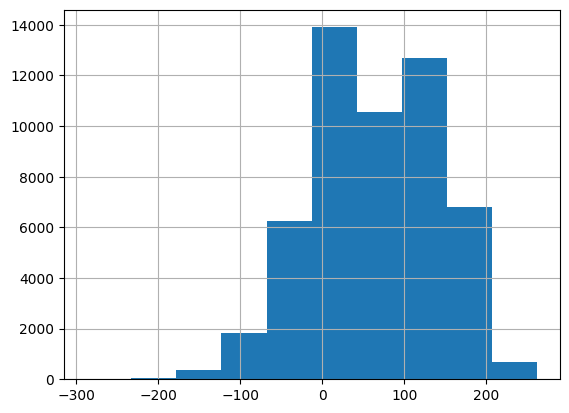

In [14]:
df.loc[df['   TG' ] != -9999]['   TG'].hist() #Is a series now

## Get specific cells

In [15]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


In [16]:
df.loc[df['    DATE'] == "1860-01-02"]['   TG'].squeeze() / 10

np.float64(4.6)

In [17]:
df.loc[df['   TG'] == df['   TG'].max()]['    DATE'].squeeze()

Timestamp('1868-08-16 00:00:00')

In [18]:
df.loc[df['    DATE'] == "1868-08-16"]['   TG'] / 10

3150    26.2
Name:    TG, dtype: float64

## Calculate new columns

In [19]:
import numpy as np
df["TG0"] = df['   TG'].mask(df['   TG'] == -9999, np.nan)
df

,STAID,SOUID,DATE,TG,Q_TG,TG0
0,1,35381,1860-01-01,21,0,21.0
1,1,35381,1860-01-02,46,0,46.0
2,1,35381,1860-01-03,31,0,31.0
3,1,35381,1860-01-04,37,0,37.0
4,1,35381,1860-01-05,31,0,31.0
...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN
59317,1,35381,2022-05-28,-9999,9,NaN
59318,1,35381,2022-05-29,-9999,9,NaN
59319,1,35381,2022-05-30,-9999,9,NaN


In [20]:
df["TG"] = df["TG0"] / 10

In [21]:
df["Fahrenheit"] = df["TG0"] * (9/5) + 32

In [22]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG0,TG,Fahrenheit
0,1,35381,1860-01-01,21,0,21.0,2.1,69.8
1,1,35381,1860-01-02,46,0,46.0,4.6,114.8
2,1,35381,1860-01-03,31,0,31.0,3.1,87.8
3,1,35381,1860-01-04,37,0,37.0,3.7,98.6
4,1,35381,1860-01-05,31,0,31.0,3.1,87.8
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN,NaN


## Plotting

<Axes: >

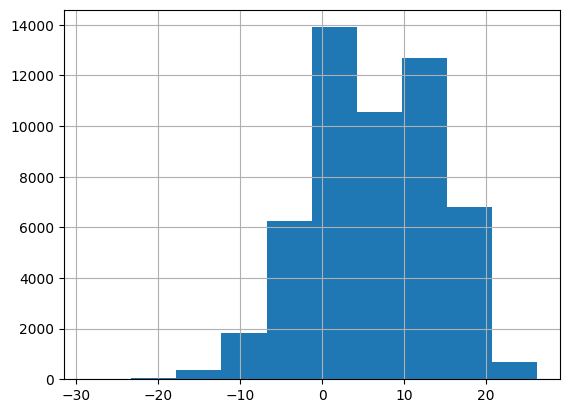

In [23]:
df["TG"].hist()

<Axes: xlabel='    DATE'>

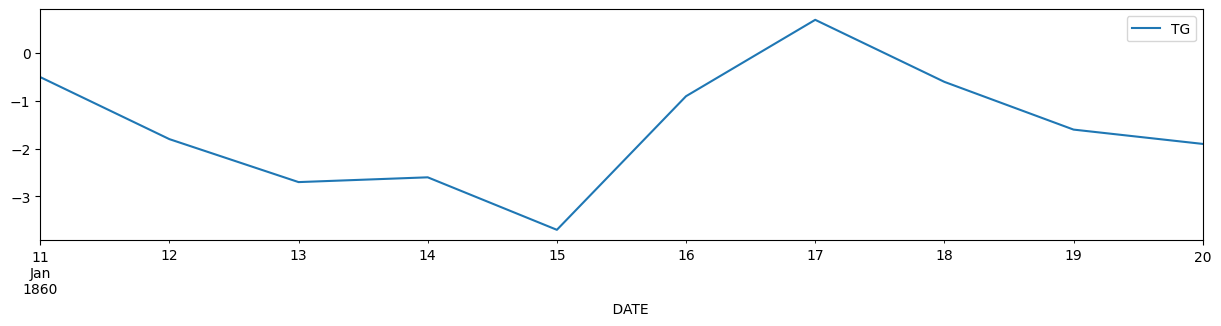

In [24]:
df[10:20].plot(x='    DATE', y="TG", figsize=(15,3))

In [25]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG', 'TG0', 'TG',
       'Fahrenheit'],
      dtype='object')

In [26]:
stations = pd.read_csv("datasets/data-small/stations.txt", skiprows=17)
stations

,STAID,STANAME,CN,LAT,LON,HGHT
0,1,VAEXJOE,SE,+56:52:00,+014:48:00,166
1,2,FALUN,SE,+60:37:00,+015:37:00,160
2,3,STENSELE,SE,+65:04:00,+017:09:59,325
3,4,LINKOEPING,SE,+58:24:00,+015:31:59,93
4,5,LINKOEPING-MALMSLAETT,SE,+58:24:00,+015:31:59,93
...,...,...,...,...,...,...
6449,25149,LEBORK,PL,+54:33:11,+017:43:24,44
6450,25150,GDANSK-REBIECHOWO_OLD,PL,+54:22:59,+018:28:00,144
6451,25151,ELBLAG-MILEJEWO,PL,+54:13:23,+019:32:36,151
6452,25156,KROSNO,PL,+49:42:24,+021:46:09,326


In [27]:
stations.columns

Index(['STAID', 'STANAME                                 ', 'CN', '      LAT',
       '       LON', 'HGHT'],
      dtype='object')

In [28]:
import pandas as pd

In [29]:
stations = pd.read_csv("datasets/data-small/stations.txt", skiprows=17)

In [30]:
stations

,STAID,STANAME,CN,LAT,LON,HGHT
0,1,VAEXJOE,SE,+56:52:00,+014:48:00,166
1,2,FALUN,SE,+60:37:00,+015:37:00,160
2,3,STENSELE,SE,+65:04:00,+017:09:59,325
3,4,LINKOEPING,SE,+58:24:00,+015:31:59,93
4,5,LINKOEPING-MALMSLAETT,SE,+58:24:00,+015:31:59,93
...,...,...,...,...,...,...
6449,25149,LEBORK,PL,+54:33:11,+017:43:24,44
6450,25150,GDANSK-REBIECHOWO_OLD,PL,+54:22:59,+018:28:00,144
6451,25151,ELBLAG-MILEJEWO,PL,+54:13:23,+019:32:36,151
6452,25156,KROSNO,PL,+49:42:24,+021:46:09,326


In [31]:
stations.columns

Index(['STAID', 'STANAME                                 ', 'CN', '      LAT',
       '       LON', 'HGHT'],
      dtype='object')

In [32]:
type(stations.columns)

pandas.core.indexes.base.Index

In [33]:
stations.columns[0], stations.columns[1]

('STAID', 'STANAME                                 ')

In [44]:
get_id_list = stations['STAID'].to_list()

In [43]:
"".join(get_id_list for i in stations["STAID"])

TypeError: sequence item 0: expected str instance, list found

In [ ]:
teste = ", ".join(map(str, stations['STAID'].to_list()))

In [ ]:
stations

In [ ]:
stations[["STAID", "STANAME                                 "]]

In [ ]:
df

In [ ]:
df.columns

In [ ]:
df[4].loc["1860" in df["    DATE"]["   TG"]

In [ ]:
df["STAID"][4][df["    DATE"].str.contains("1860")]

In [ ]:
df.loc[df["STAID"] == 1, "    DATE"].astype(str).str.contains("1860")

In [ ]:
df.loc[(df["STAID"] == 1) & (df["    DATE"].astype(str).str.contains("1860"))]